In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path = '/mnt/h/work_projects/College/DM_Projects/course_project_2/data/archive 1'
path = 'H:/work_projects/College/DM_Projects/course_project_2/data/archive 1'
dir_list = os.listdir(path)
df2 = pd.DataFrame()
for i in dir_list:
    if df2.empty:
        df2 = pd.read_csv(path + '/' + i, sep='|', na_values='-')
    else:
        df2 = pd.concat([pd.read_csv(path + '/' + i, sep='|', na_values='-'), df2], axis=0)

C:\Users\prath\AppData\Local\Temp\ipykernel_620\1452999338.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path + '/' + i, sep='|', na_values='-')
C:\Users\prath\AppData\Local\Temp\ipykernel_620\1452999338.py:9: DtypeWarning: Columns (7,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.concat([pd.read_csv(path + '/' + i, sep='|', na_values='-'), df2], axis=0)
C:\Users\prath\AppData\Local\Temp\ipykernel_620\1452999338.py:9: DtypeWarning: Columns (7,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.concat([pd.read_csv(path + '/' + i, sep='|', na_values='-'), df2], axis=0)
C:\Users\prath\AppData\Local\Temp\ipykernel_620\1452999338.py:9: DtypeWarning: Columns (7,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.concat([pd.read_csv(path + '/' + i, sep='|', na_values='-'), df2], axis=0)
C:\Users\prat

In [3]:
df2.shape

(25000363, 23)

In [4]:
df = df2.drop(columns=['uid', 'local_orig', 'local_resp', 'tunnel_parents', 'detailed-label', 'id.orig_h', 'id.resp_h'])
del df2

<Axes: ylabel='label'>

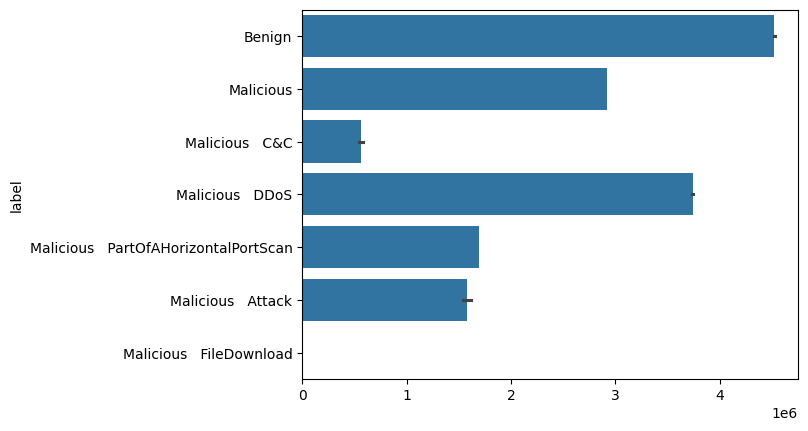

In [6]:
sns.barplot(df['label'])

In [5]:
df['history'] = pd.factorize(df['history'])[0]
df['proto'] = pd.factorize(df['proto'])[0]
df['conn_state'] = pd.factorize(df['conn_state'])[0]
df['service'] = pd.factorize(df['service'])[0]
df['label'] = pd.factorize(df['label'])[0]

In [6]:
df['duration'] = df['duration'].astype('float')
df['orig_bytes'] = df['orig_bytes'].astype('float')
df['resp_bytes'] = df['resp_bytes'].astype('float')

In [9]:
df = df.fillna(0)

<Axes: >

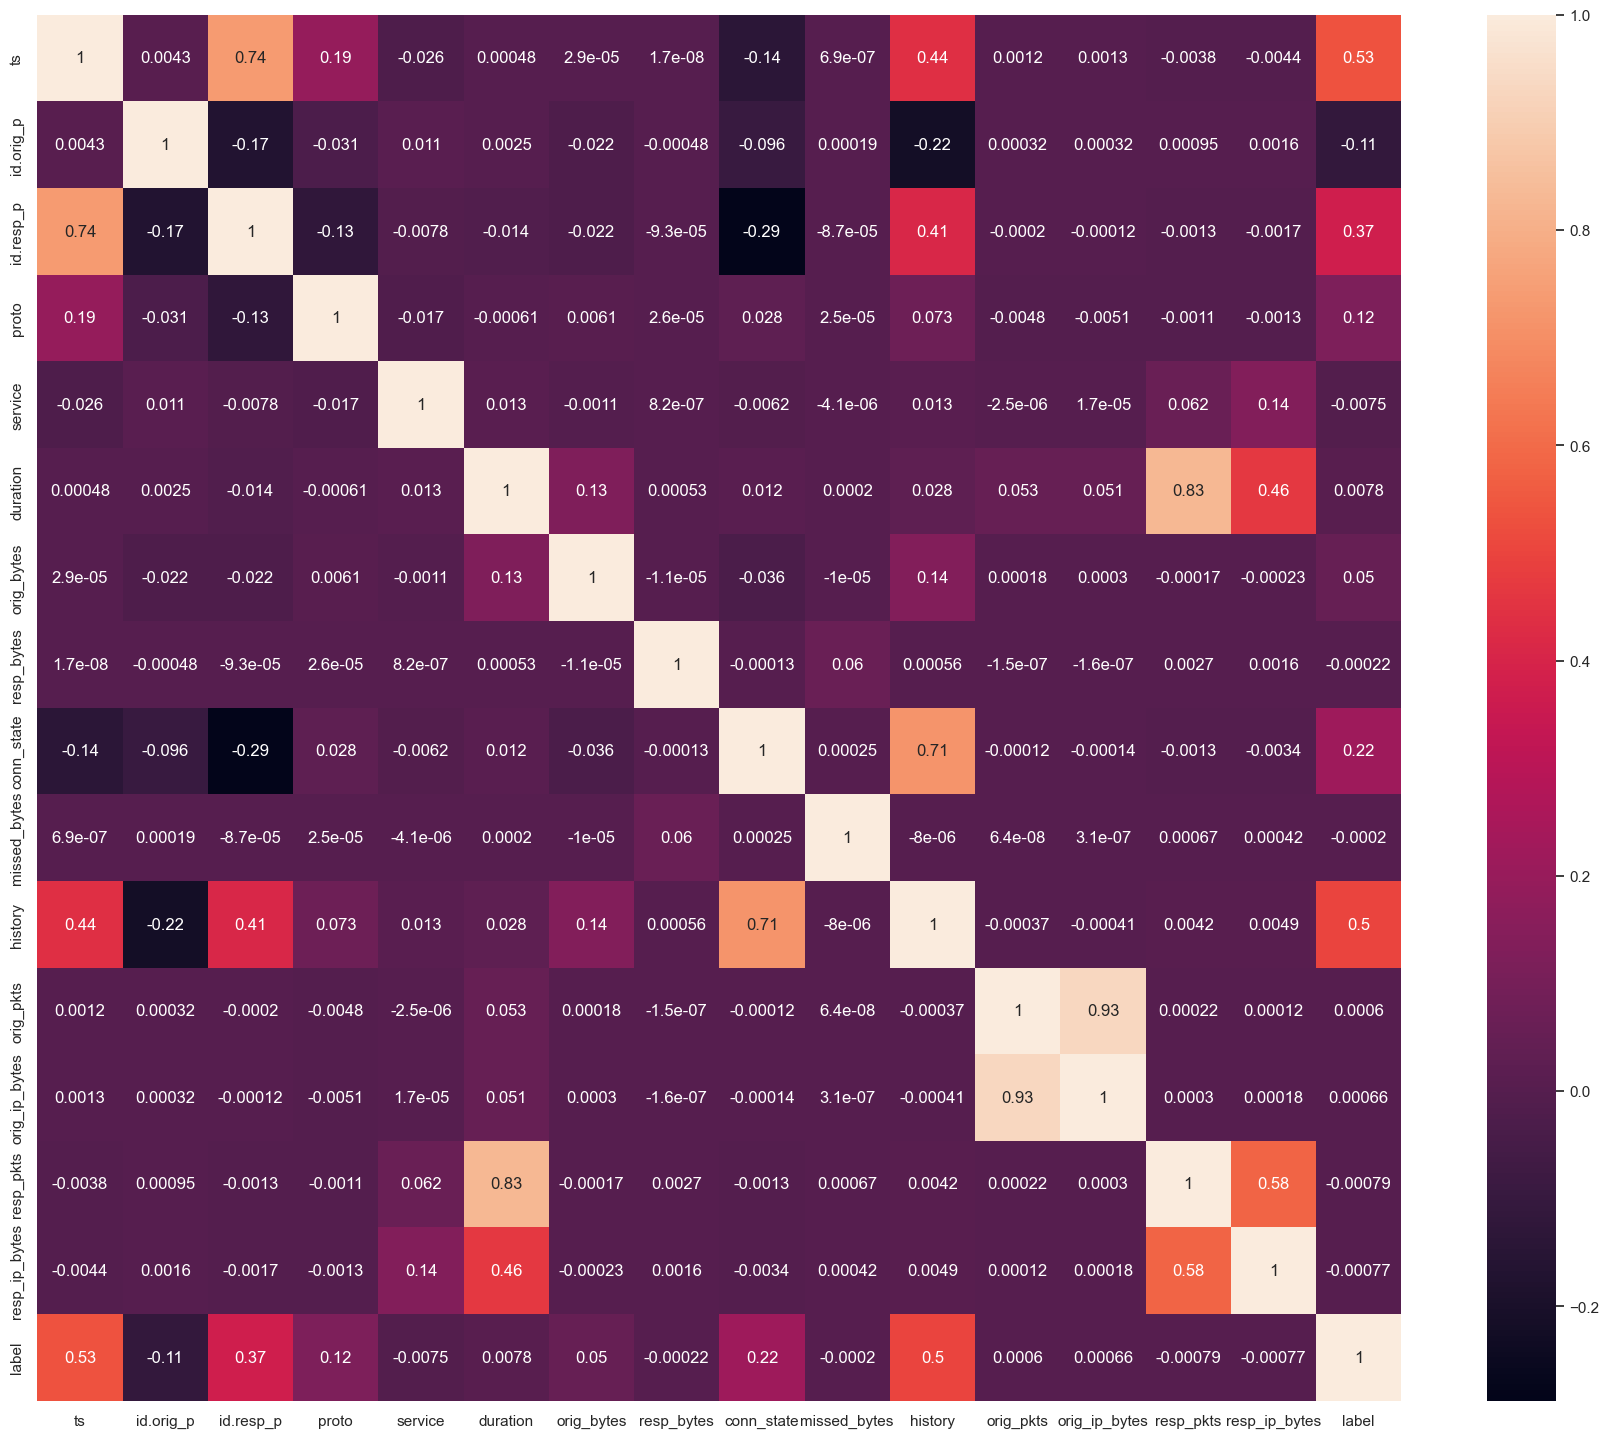

In [10]:
sns.set(rc={'figure.figsize':(22,18)})

sns.heatmap(df.corr(), annot=True)